In [1]:
# Code from last time
# "Forward iteration method", Boundary Scanning Method
import numpy
def julia_color(c, max_iter, xmin=-2.0, xmax=2.0, ymin=-2.0,ymax=2.0, width=500, height=500):
    """Draw Julia set J(f) for f(z)=z^2+c, c a fixed complex number with |c|<2,
    in window where x ranges in (xmin,xmax), y ranges in (ymin,ymax), 
    grid of size width x height (in pixels)
    Test max_iter number iterates of f.
    Color based on how long it takes to escape"""

    xinc = (xmax-xmin)/width
    yinc = (ymax-ymin)/height

    escape = numpy.zeros((height,width))
    # array will eventually represent escaping

    for x in range(width):
        for y in range(height): 
            z = complex(xmin + x*xinc, ymin + y*yinc)
            # Want: set escape[y,x]=1 if z escapes i.e. |z|, |f(z)|, |f^{\circ 2}(z)| ->infty
            # Special thing about f(z) = z^2+c, when |c|<2:
            # if |z|>2, |f^{\circ n}(z)|-> infty as n ->infty
            # So: if for any z, |f^{\circ k}(z)|>2, z escapes 
            
            # compute iterates of f applied to z 
            n=0 # which iterate we're currently on
            while n < max_iter: 
                z = z^2 + c # take next iterate i.e. replace z by f(z)
                n+=1
                if abs(z)>2:
                    # then by above comments, know that original z escapes 
                    break # breaks out of containing loop 
            # at this point n is between 0 and max_iter,
            # bigger the longer it took escape
            escape[y,x]=n/max_iter
            # if didn't escape, n=max_iter
    
    return matrix_plot(escape, origin='lower', cmap='hot')

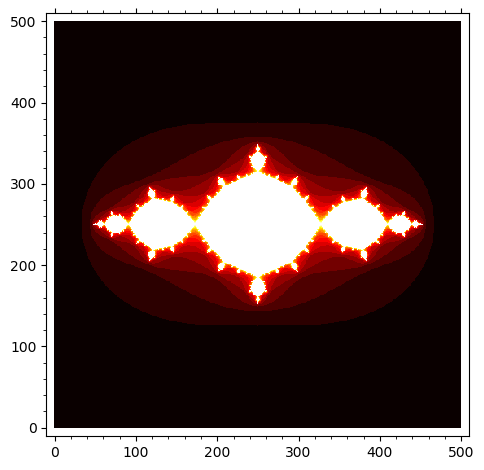

In [2]:
# Julia set for z^2-1
julia_color(complex(-1,0), 20)

In [20]:
# Today: Mandlebrot set
import numpy 
def mandlebrot(max_iter, xmin=-2.5, xmax=2.5, ymin=-2.5,ymax=2.5, width=500, height=500):
    """Draws Mandlebrot of quadratic family.  Point c is in Mandlebrot set if 0 is not in 
    escaping set for f_c(z) = z^2 + c.  Use grid as for julia"""
    xinc = (xmax-xmin)/width
    yinc = (ymax-ymin)/height
    
    mand = numpy.zeros((height,width)) # ultimate value based on how long 0 takes to escape
    # 1 if 0 doesn't escape for f(z)=z^2+c
    
    for x in range(width):
        for y in range(height):
            c = complex(xmin + x*xinc, ymin + y*yinc) # (x,y) in grid coords represent z^2+c
            
            # now figure out whether 0 lies in escaping of z^2 +c 
            z=0
            n=0
            while n<max_iter:
                z = z*z + c # replace z by z^2+c
                n += 1
                #test if z outside ball 
                if abs(z)>2:
                    # then definitely escape
                    break
            # at this point n=max_iter if 0 doesn't escape
            # if it does escape, n is smaller the faster it happens
            mand[y,x] = n/max_iter
    
    return matrix_plot(mand, origin='lower', cmap='hot')

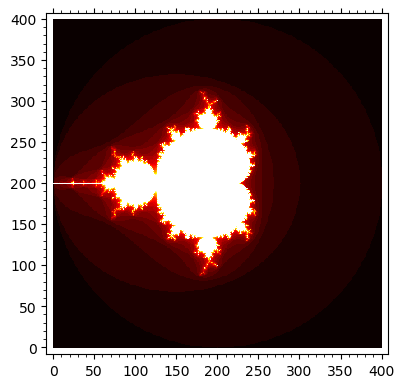

In [21]:
mandlebrot(35, -2,2,-2,2,400,400)

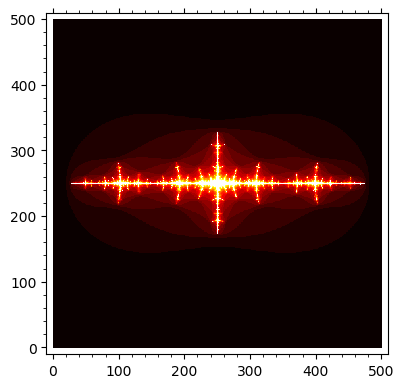

In [13]:
# Feigenbaum point 
c=complex(-1.401155,0)
julia_color(c,30)

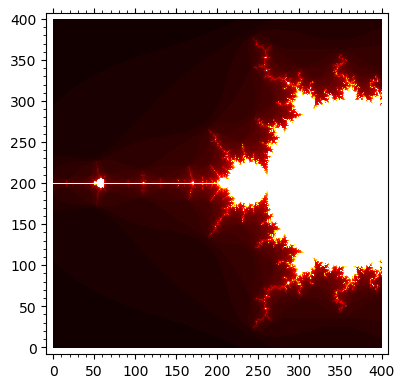

In [26]:
# Zoom in near feigenbaum point
w = 0.5 # window of side length 2w
cr = -1.401155
mandlebrot(80, cr-w, cr+w, 0-w, 0+w, 400,400)

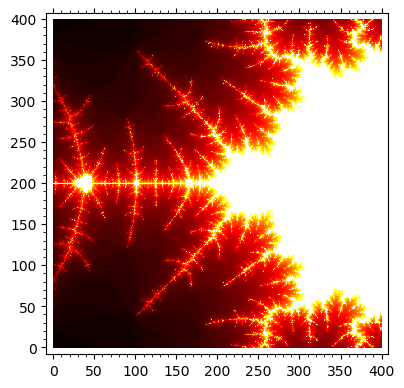

In [27]:
w = 0.02 # window of side length 2w
cr = -1.401155
mandlebrot(100, cr-w, cr+w, 0-w, 0+w, 400,400)
# A sequence of shrinking "bulbs" starting from the main cardiod on the right
# and moving to the left converges to the Feigenbaum point. 

See http://www.malinc.se/m/JuliaSets.php for a streamlined Julia/Mandlebrot interactive graphic

In [23]:
# code from last time for drawing orbits
def draw_orbit(z, c, num_iter, col='blue'):
    """Return a plot of points z,f(z),f(f(z)),.. up to num_iter iterations,
    where f(z)=z^2+c. Can set color"""
    orbit = [z] # list that will store the orbit 
    for n in range(num_iter):
        new = orbit[-1]^2 + c 
        orbit.append(new)
    return list_plot(orbit, size=20, color=col)\
    + line([(real(z),imag(z)) for z in orbit], color=col)
    

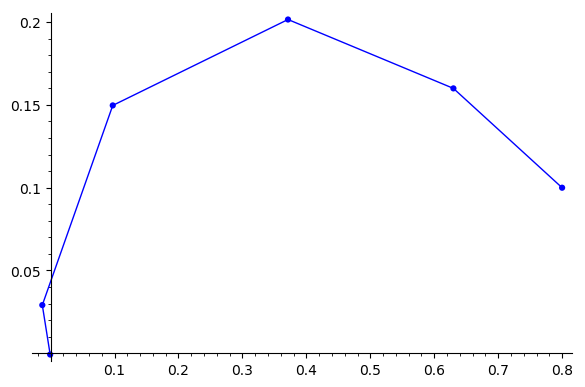

In [25]:
draw_orbit(complex(0.8,0.1), complex(0,0), 5, col='blue')

In [ ]:
# want to investigate fixed points/periodic points